In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [2]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

In [3]:
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

In [4]:
scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

WW_TuneCP5_13TeV-pythia8 7846135.924316406
WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 29431645.73828125
QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 54247036.39575195
DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11204572.71875
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176184920.0
MonoHs_Mzprime_500_Mhs_50_Mchi_150 291434.97132873535
QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8 93948237.30664062
WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 25415128.9140625
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.2890625
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.69140625
QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8 54594132.884765625
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph 340171.00390625
GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 9795369.33203125
MonoW_Mzprime_500_Mchi_150 288972.98516845703
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 5109802011.3125


In [5]:
process = hist.Cat("process", "Process", sorting='placement')

process_cats = ("pdataset",)
process_map = OrderedDict()
#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["DY"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
process_map["ZJets"] = ("ZJetsToNuNu*",)   ## temporarily 

for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
ndcsvL
ndflvL
ndcsvM
ndflvM
ndcsvT
ndflvT
nfjtot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TopTagger
DarkHiggsTagger
VvsQCDTagger
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers


In [6]:
data_hists={}
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [7]:
data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in data_hists.keys():
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

In [8]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [9]:
exp = 0
region = 'iszeroL'
jet_selection = 'baggy'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 189.6
DY 3757.7
Diboson 10779.9
ST 4420.6
TT 28679.3
Wjets 278040.0
ZJets 528115.7
------------------
Total expected: 853982.8
------------------
------------------



In [10]:
exp = 0
region = 'iszeroL'
jet_selection = 'topveto'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 124.6
DY 3223.1
Diboson 9080.7
ST 1789.1
TT 7835.1
Wjets 237580.6
ZJets 457101.8
------------------
Total expected: 716735.0
------------------
------------------



In [11]:
exp = 0
region = 'iszeroL'
jet_selection = 'ismonohs'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 102.5
DY 274.9
Diboson 975.9
ST 573.7
TT 2932.7
Wjets 17610.2
ZJets 35120.6
------------------
Total expected: 57590.4
------------------
------------------



In [13]:
exp = 0
region = 'iszeroL'
jet_selection = 'ismonoV'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 9.3
DY 1042.7
Diboson 4504.4
ST 636.2
TT 2684.0
Wjets 82857.4
ZJets 156178.1
------------------
Total expected: 247912.0
------------------
------------------



In [14]:
exp = 0
region = 'iszeroL'
jet_selection = 'ismonojet'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected:', '%.1f' % exp)
#print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 12.9
DY 1905.5
Diboson 3600.3
ST 579.2
TT 2218.5
Wjets 137113.0
ZJets 265803.1
------------------
Total expected: 411232.6
------------------
------------------



/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


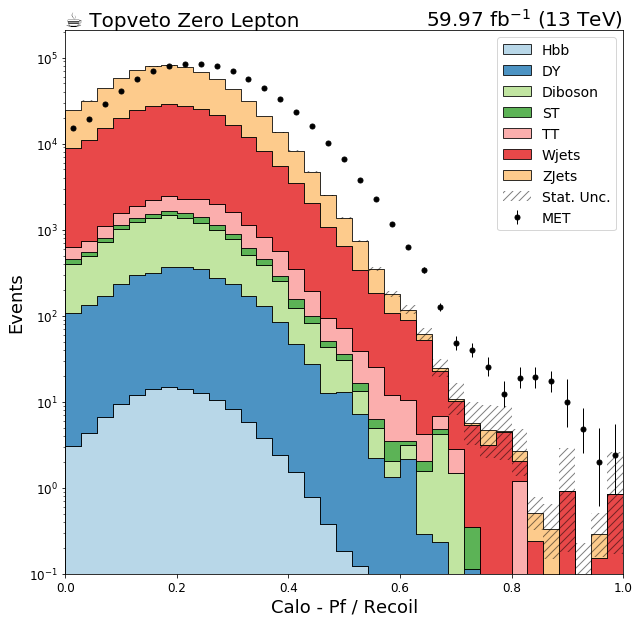

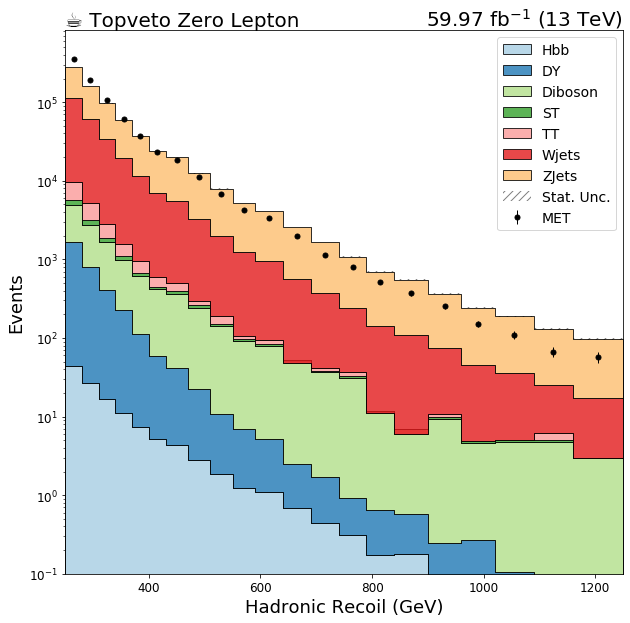

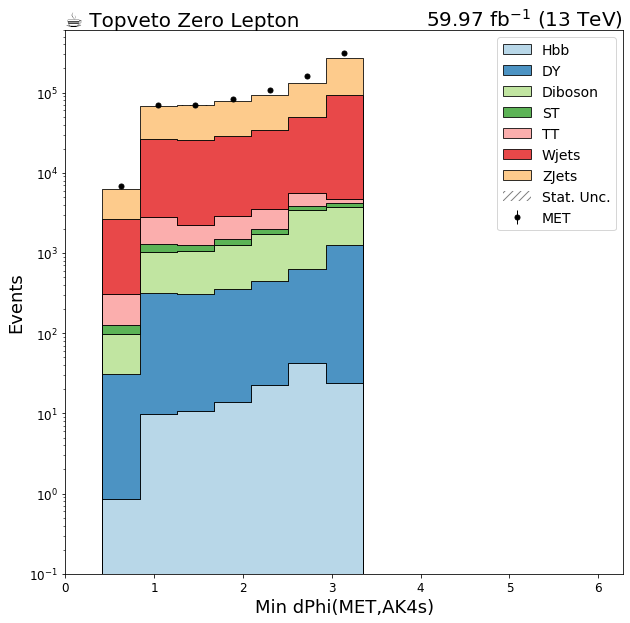

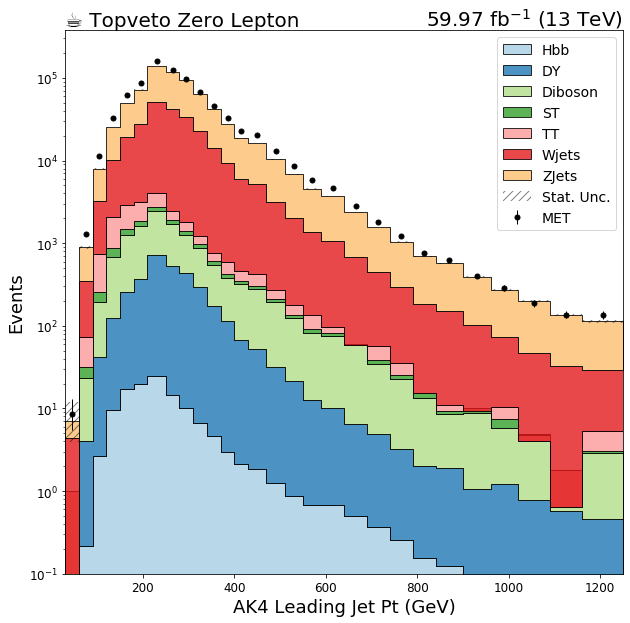

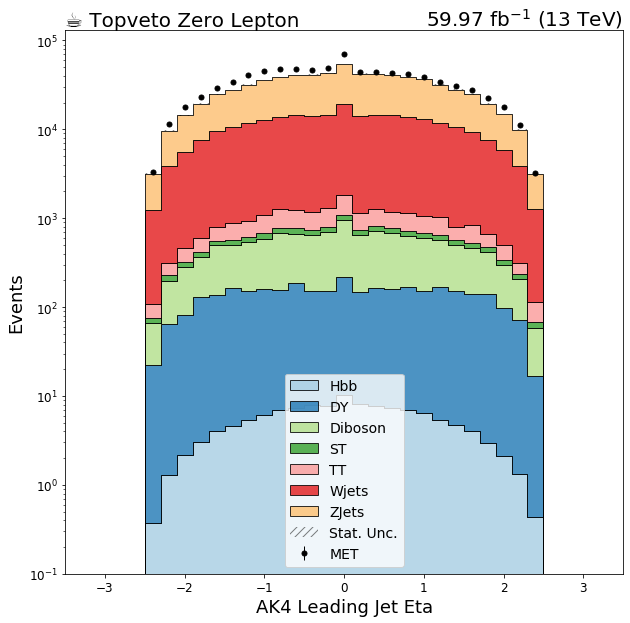

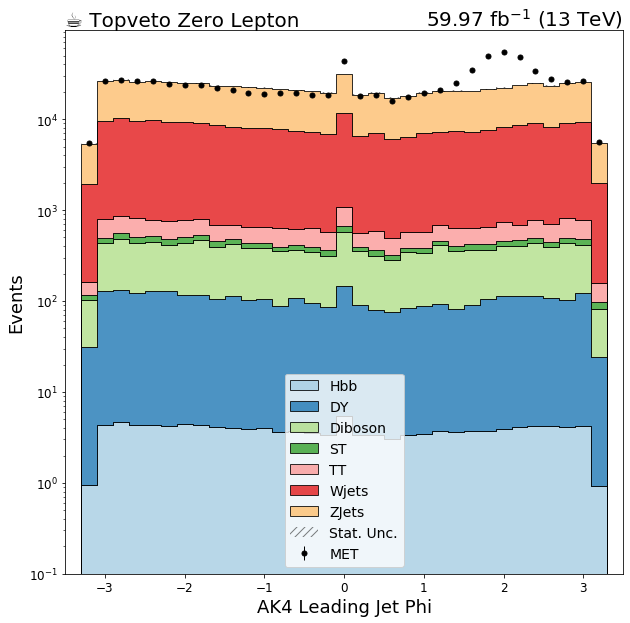

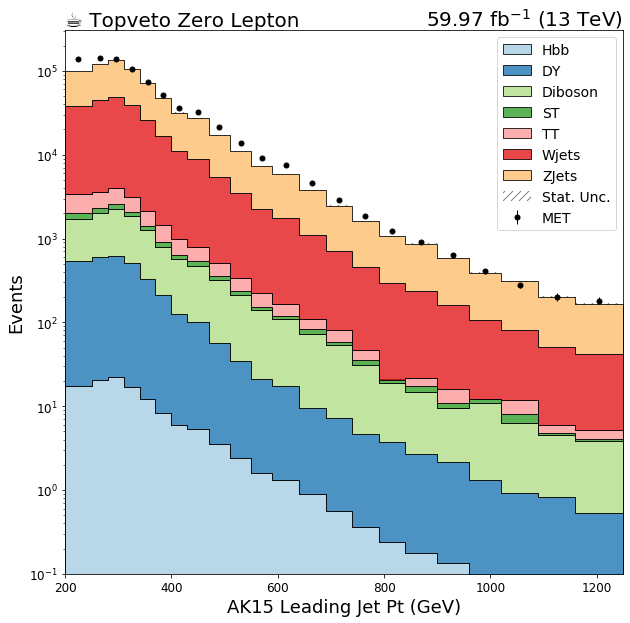

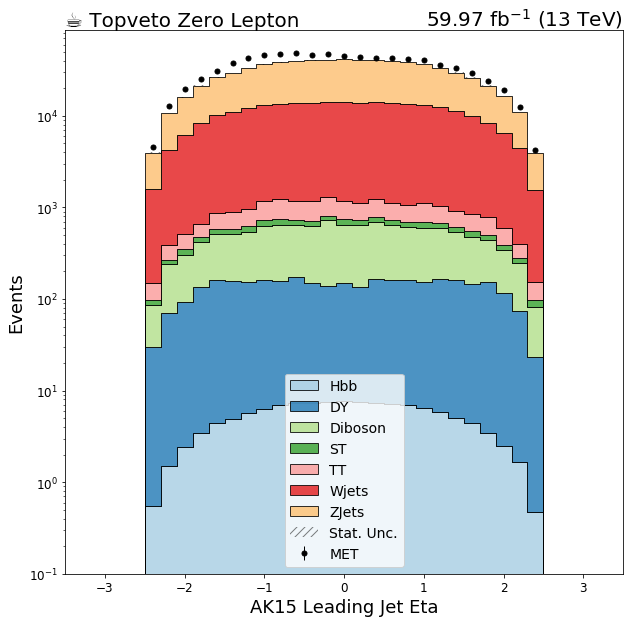

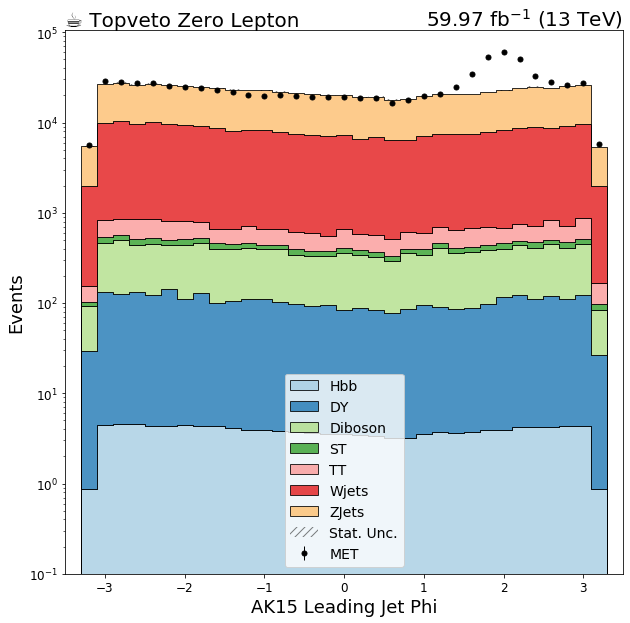

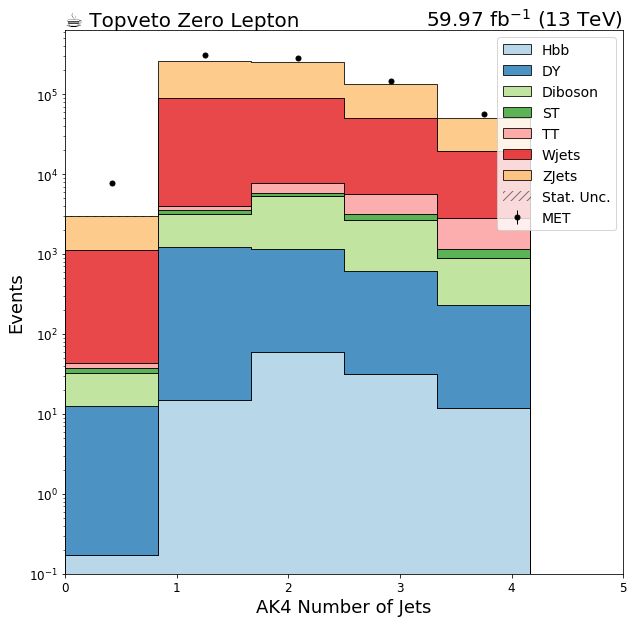

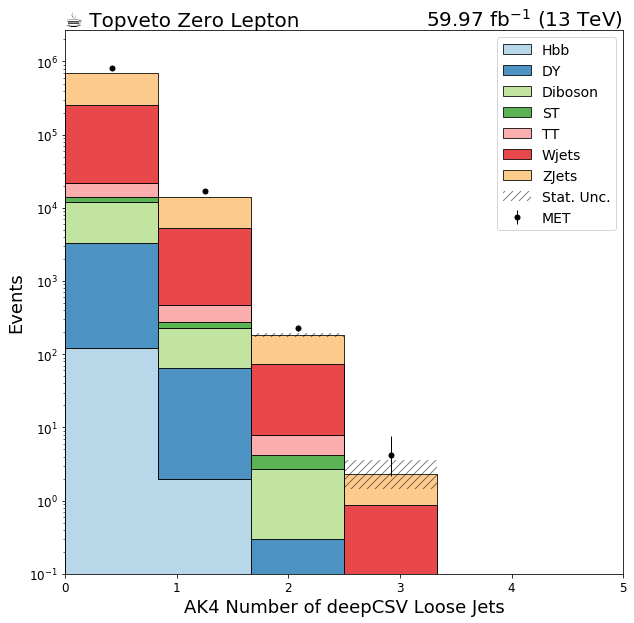

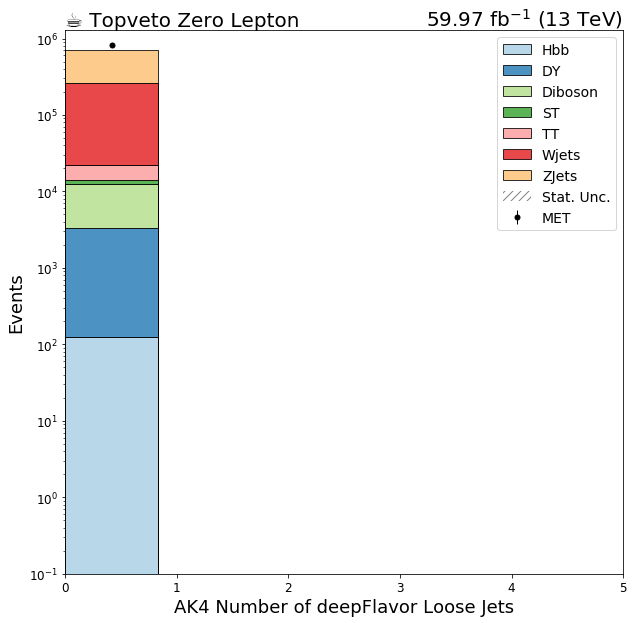

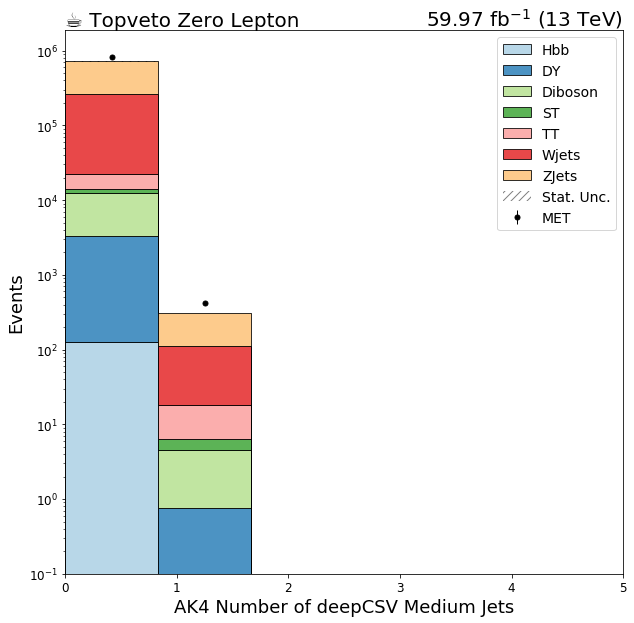

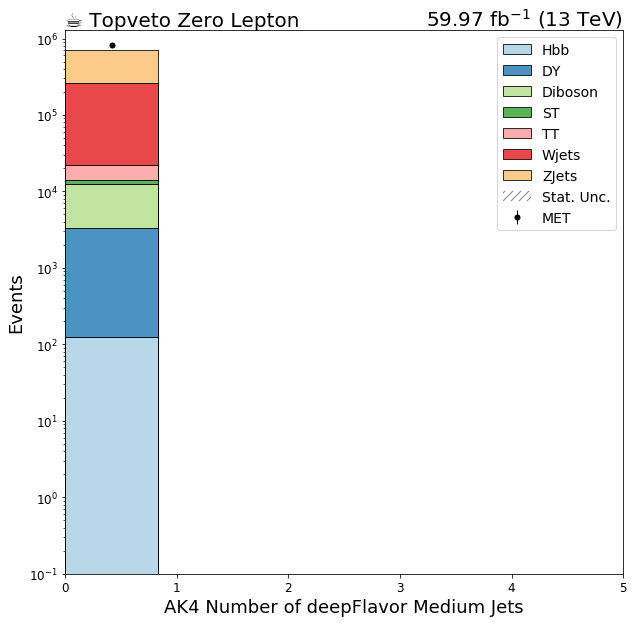

In [ ]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
#colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    jet_selection = 'topveto'
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(data_hists[key].project('jet_selection',jet_selection).project('region','iszeroL'),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','iszeroL'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
            #line_opts={'linestyle':'-','color':'k','label':'_'},
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Topveto Zero Lepton", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempting to set identical bottom == top == 9.99999999999999 results in singular transformations; automatically expanding.
  del sys.path[0]


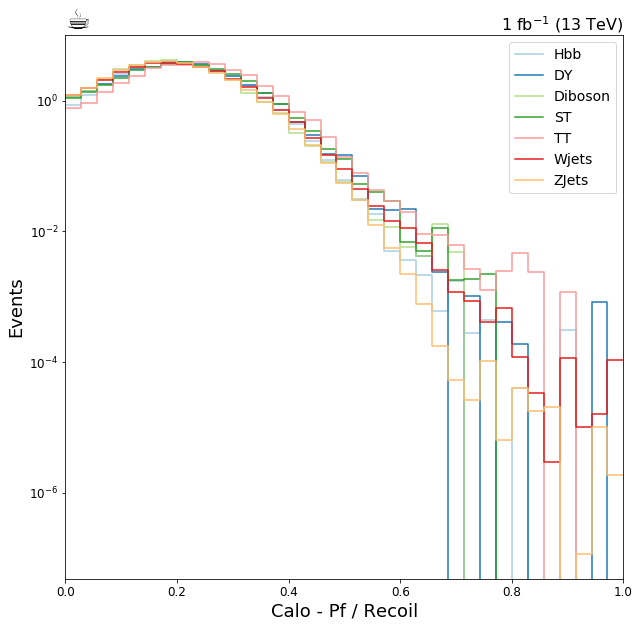

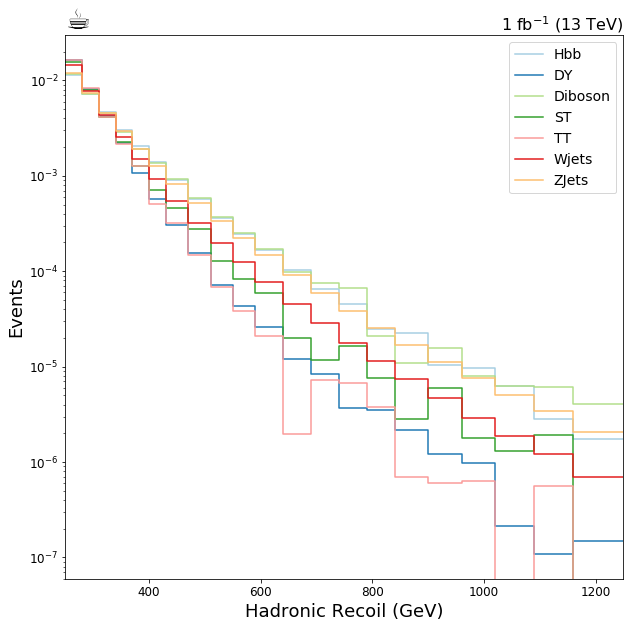

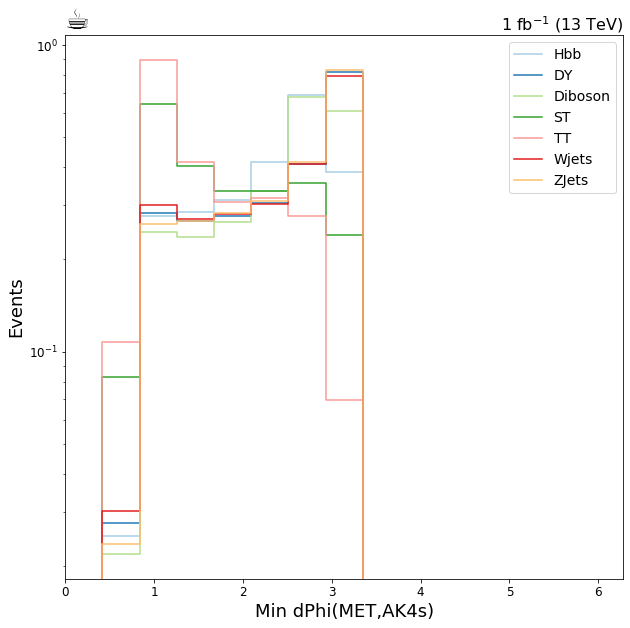

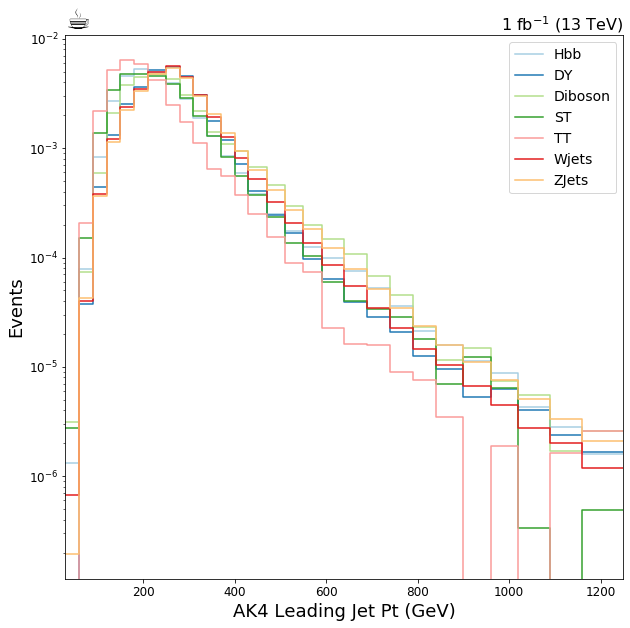

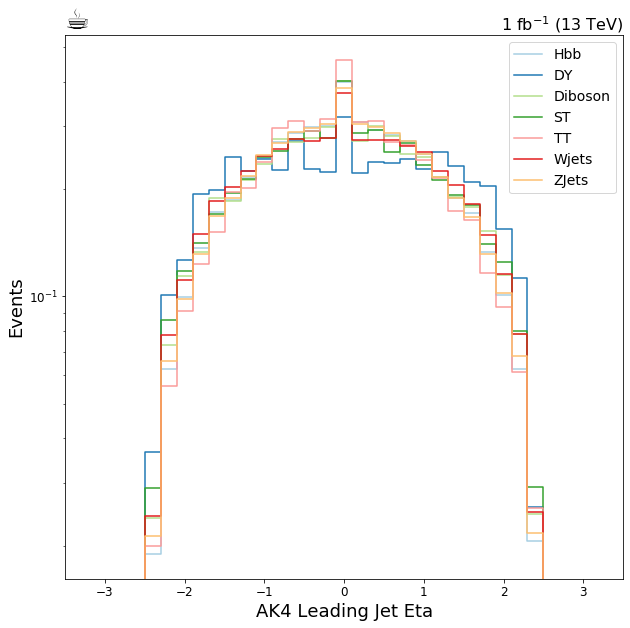

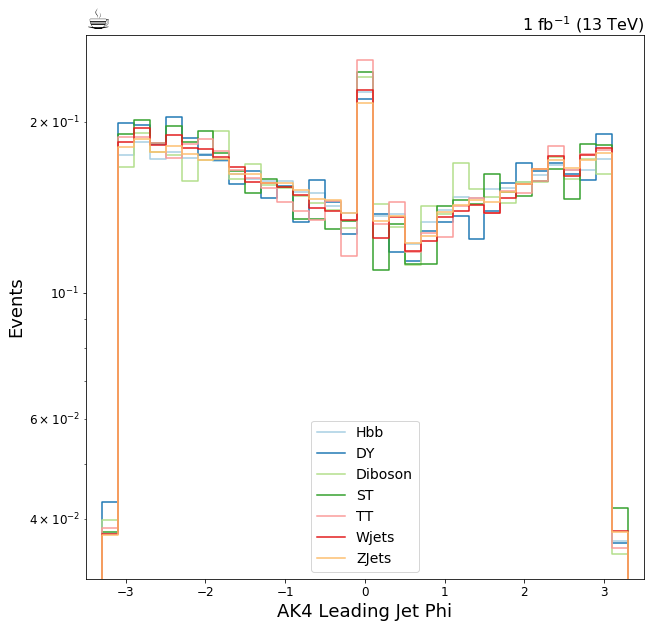

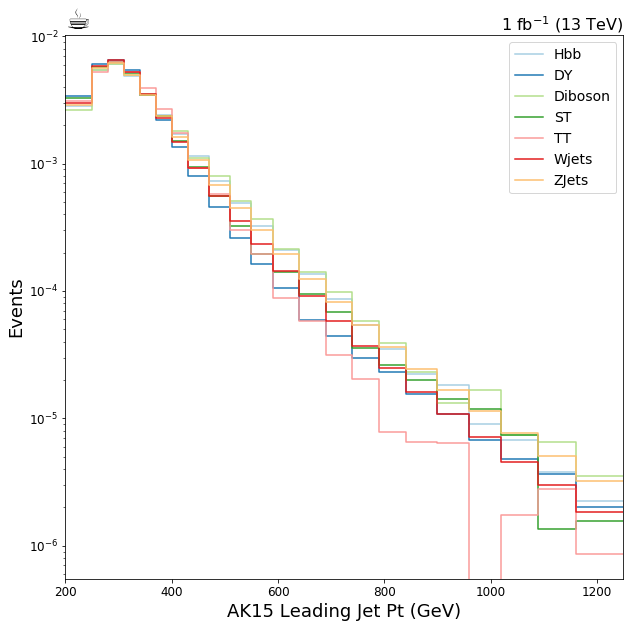

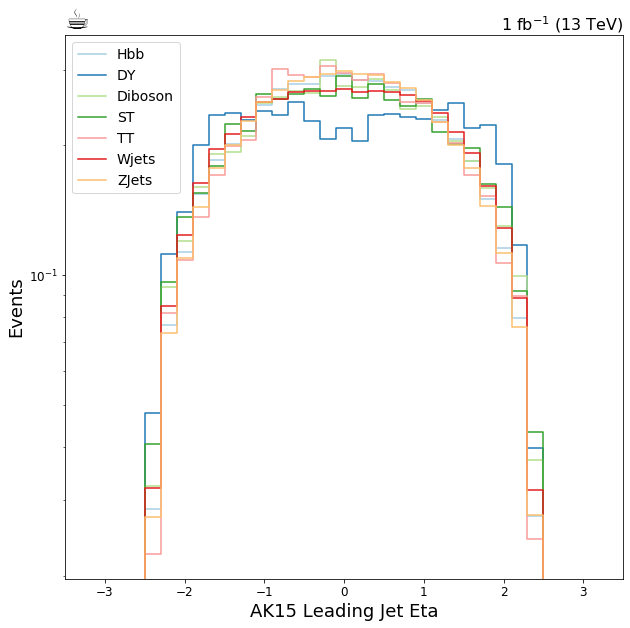

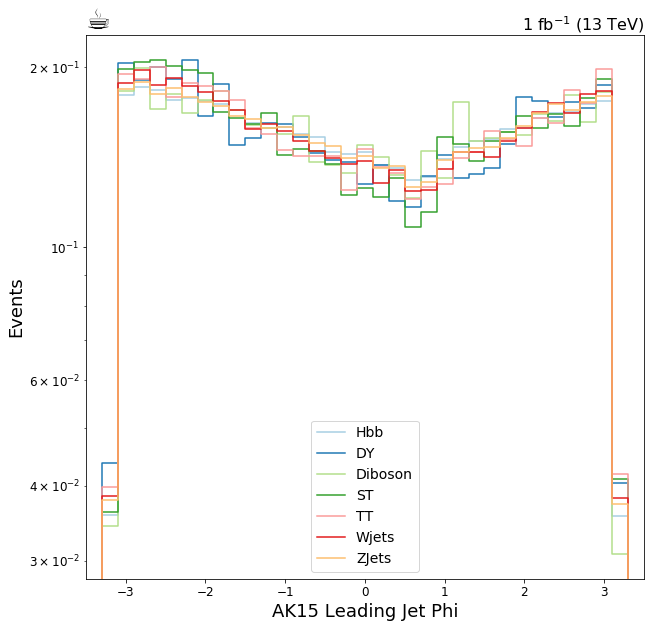

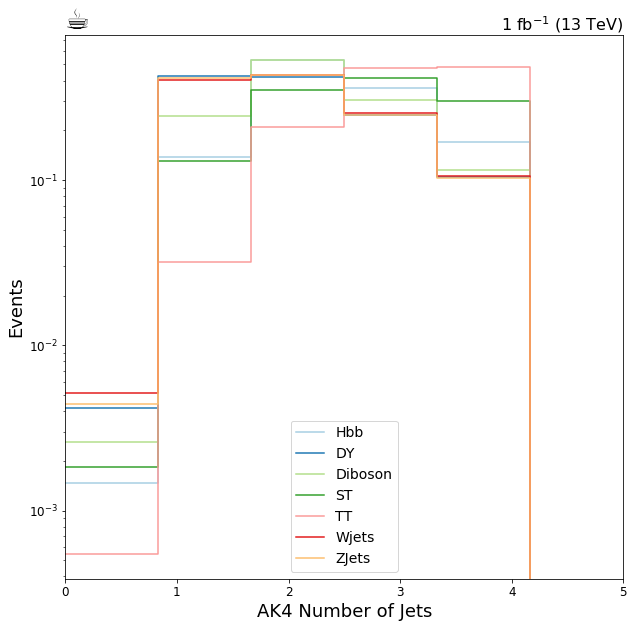

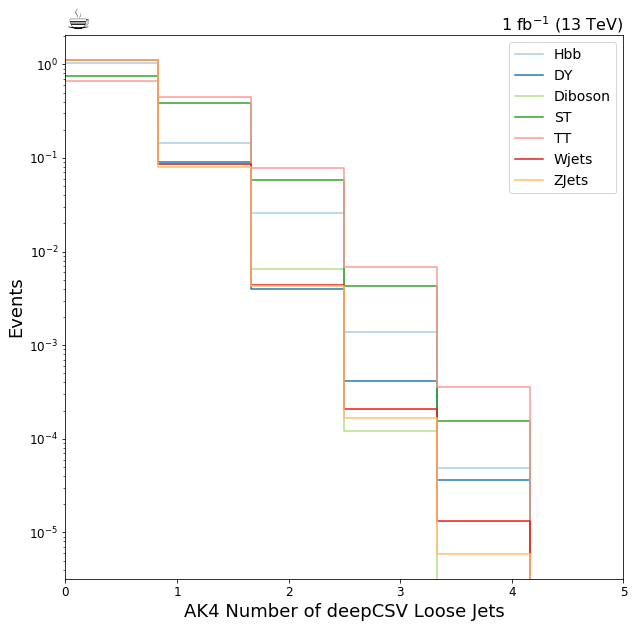

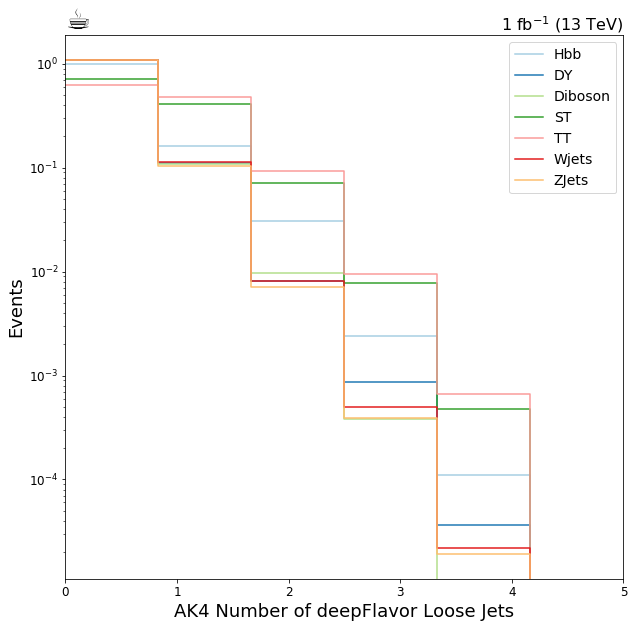

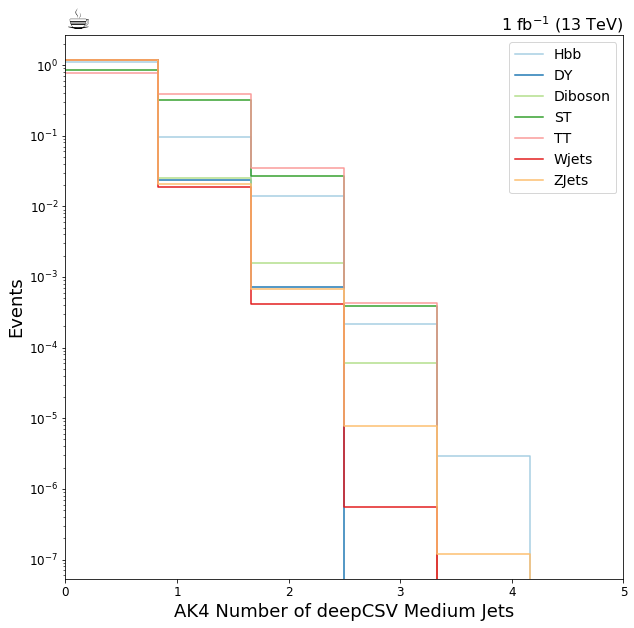

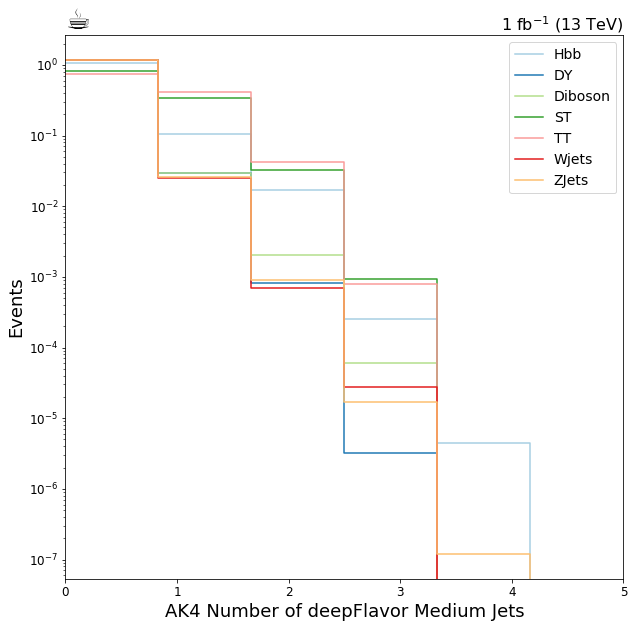

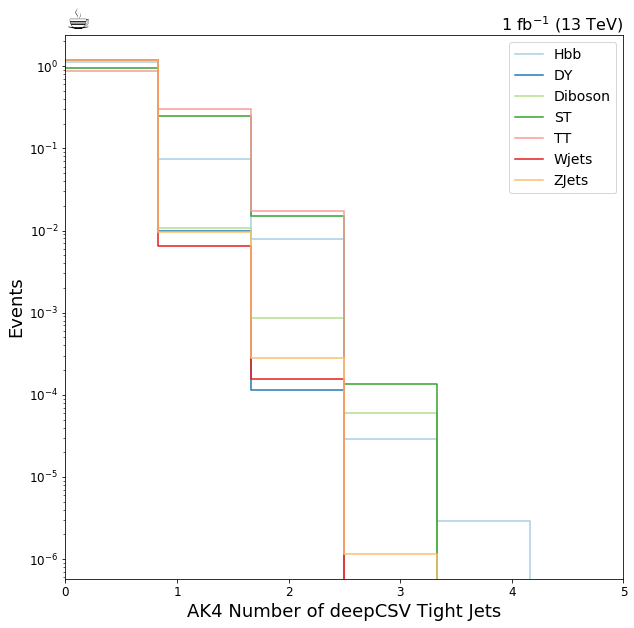

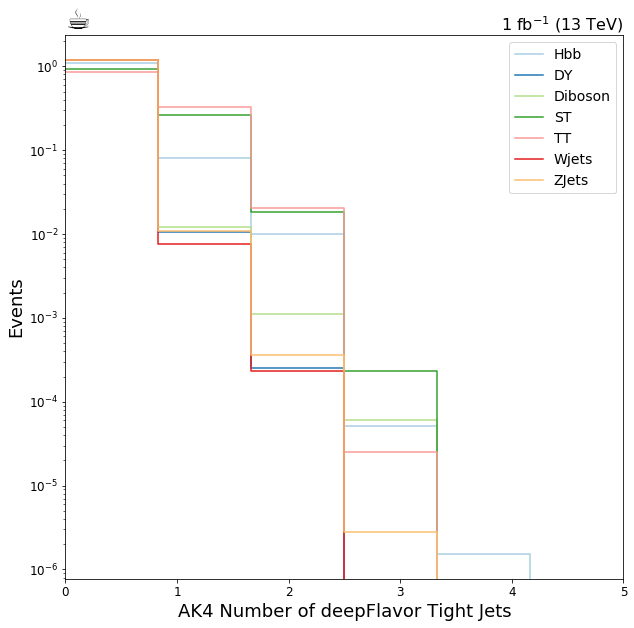

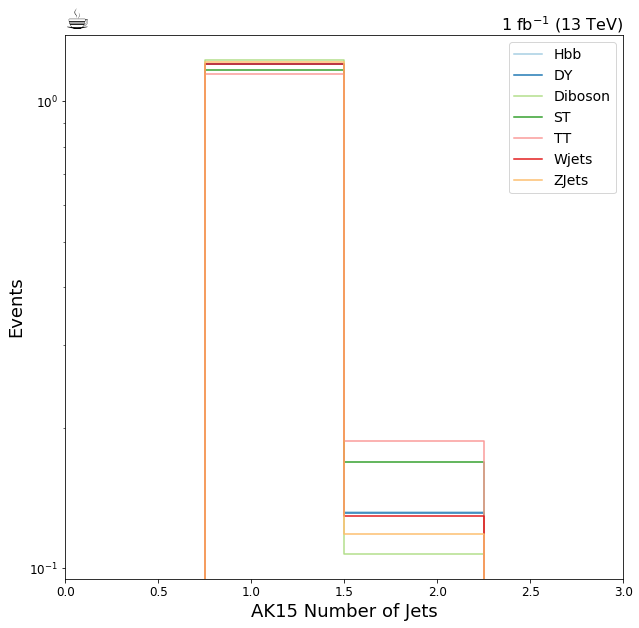

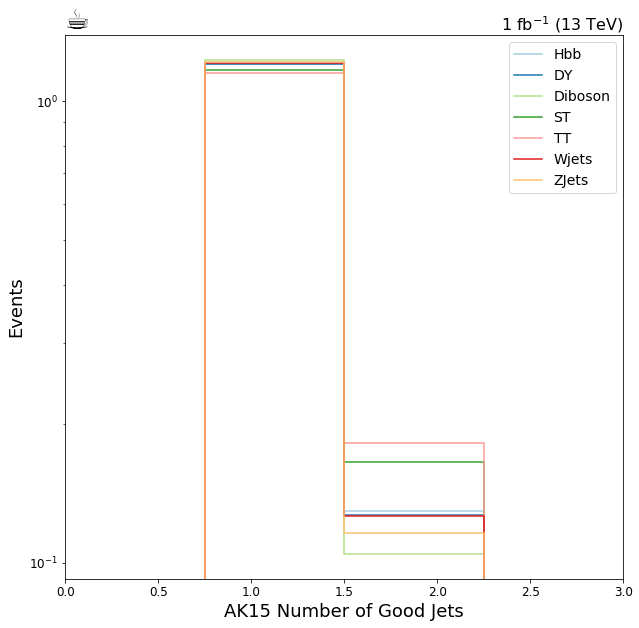

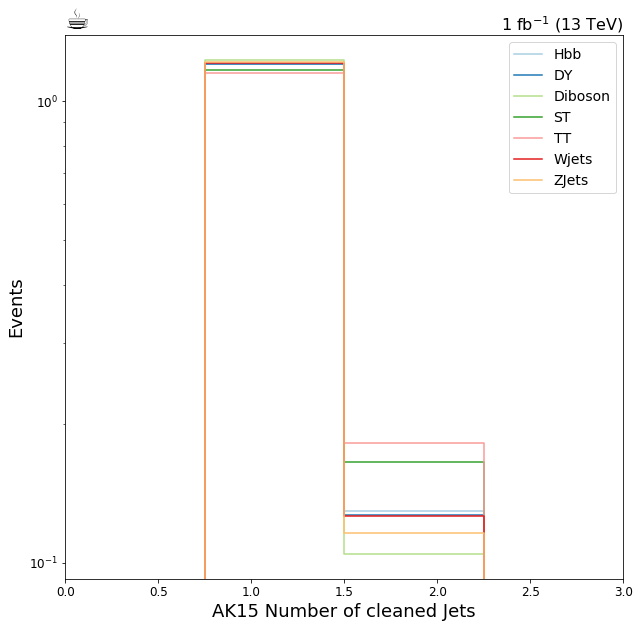

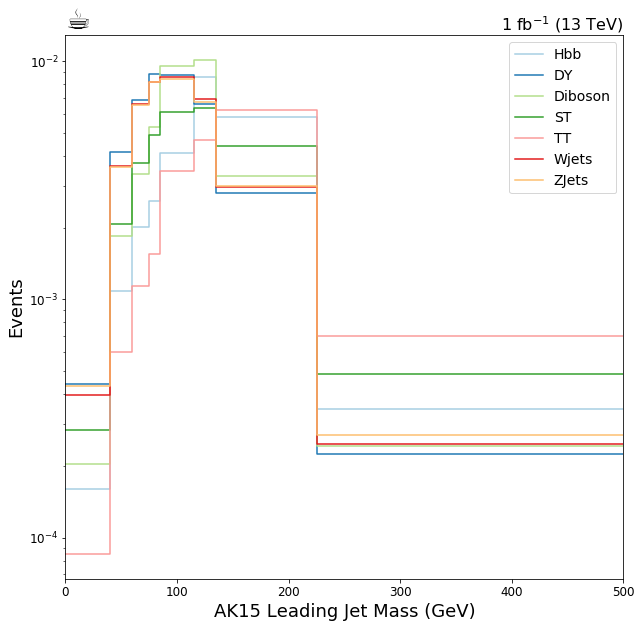

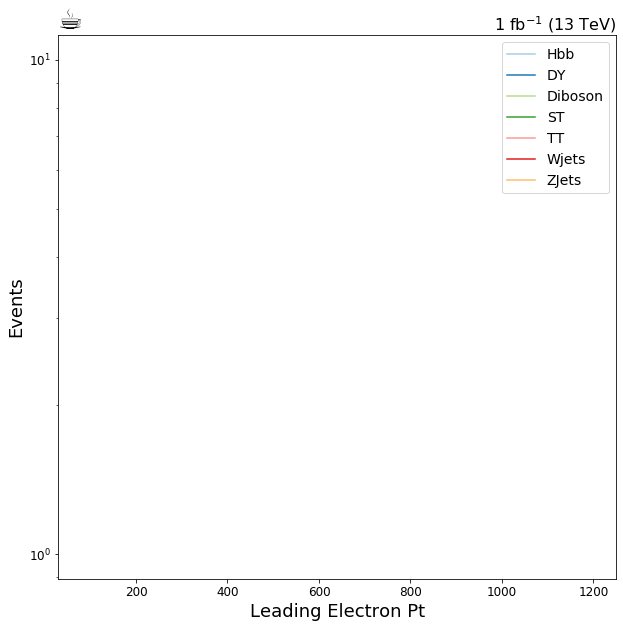

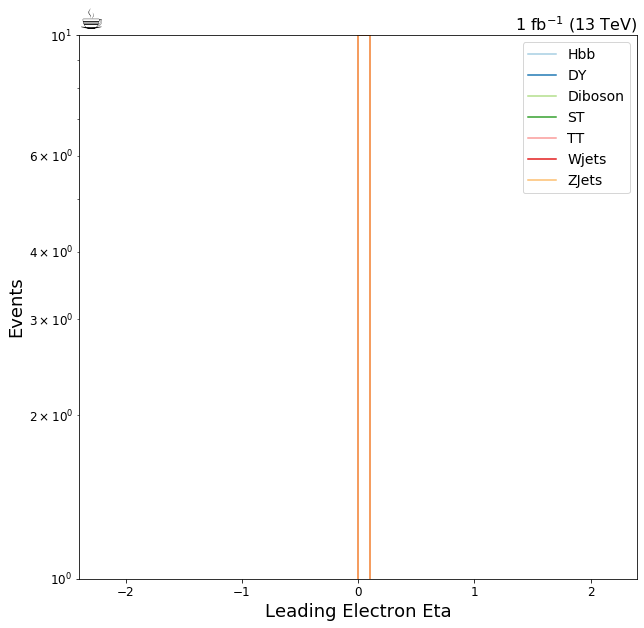

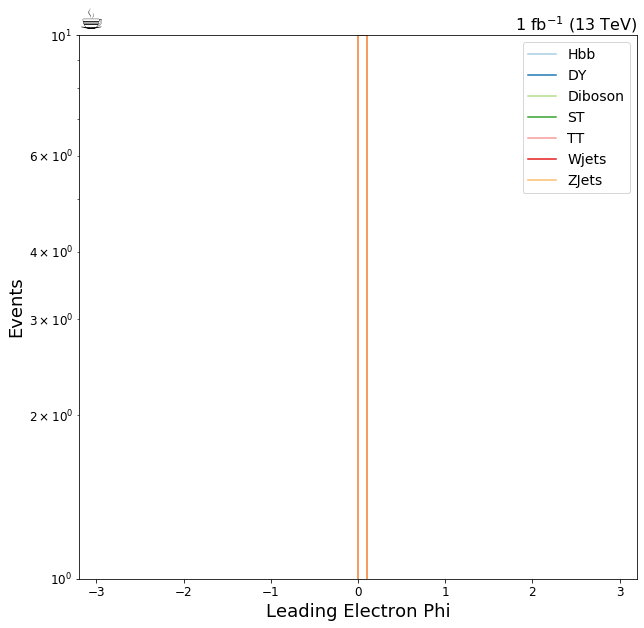

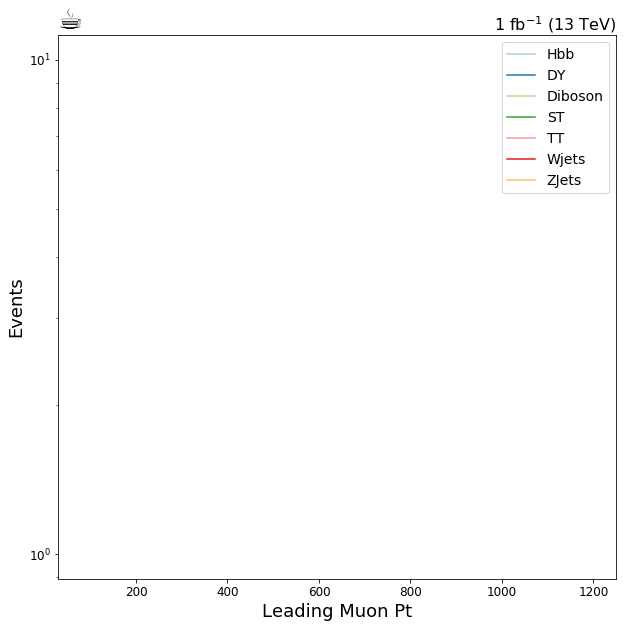

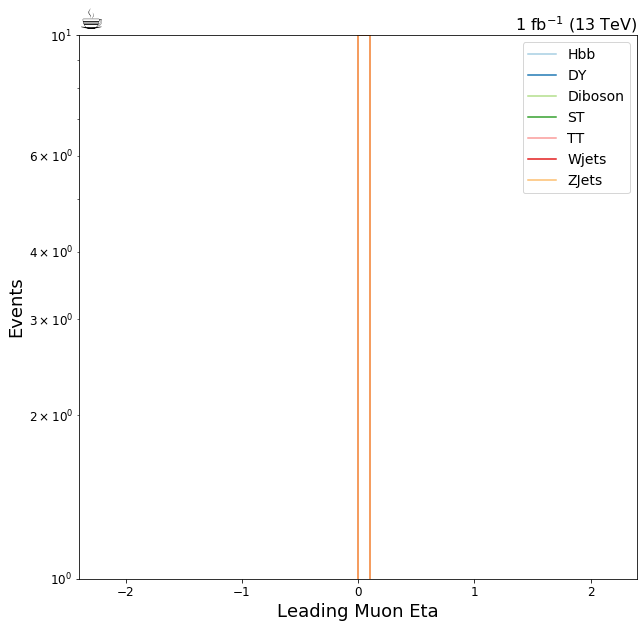

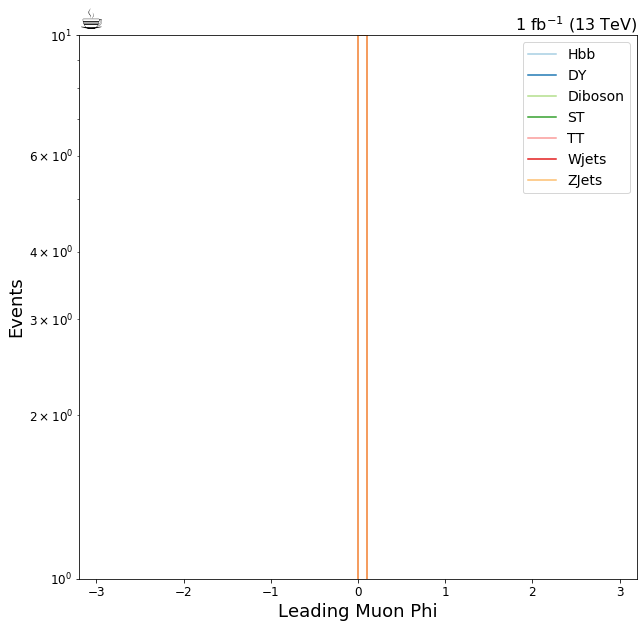

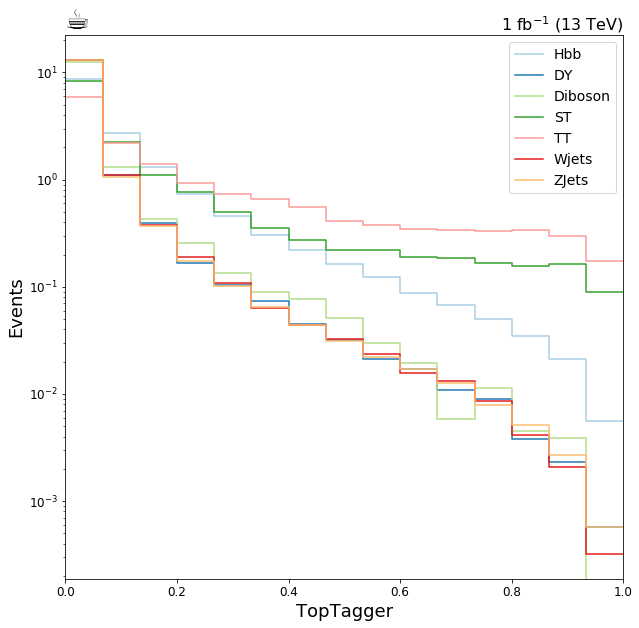

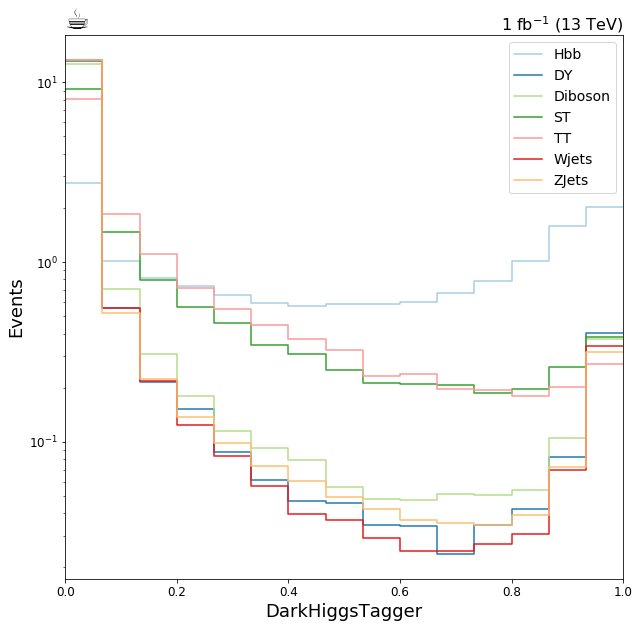

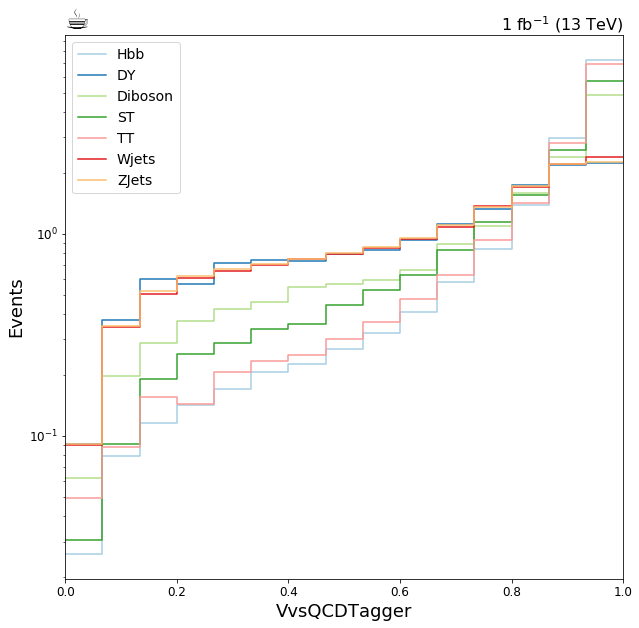

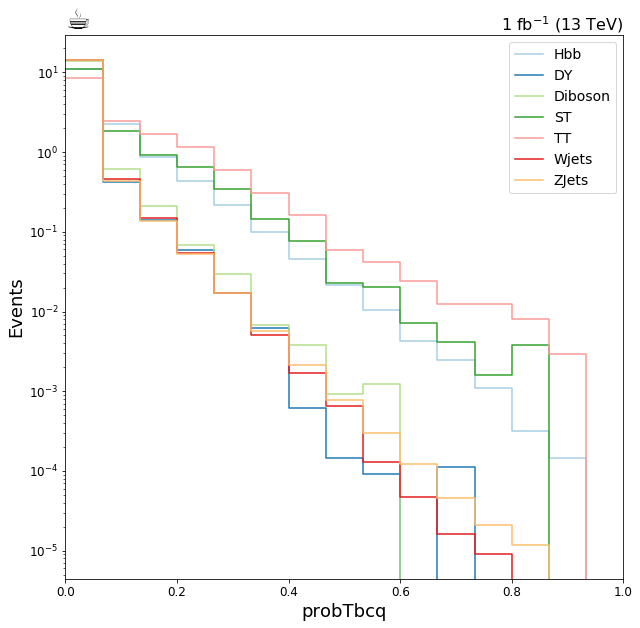

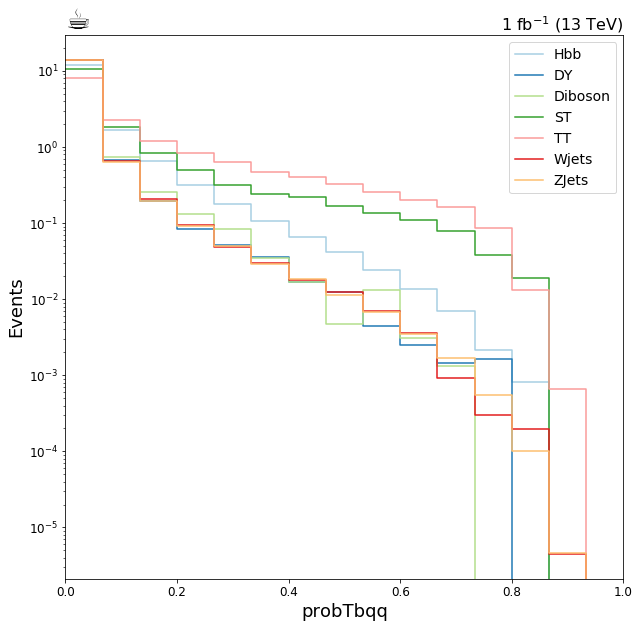

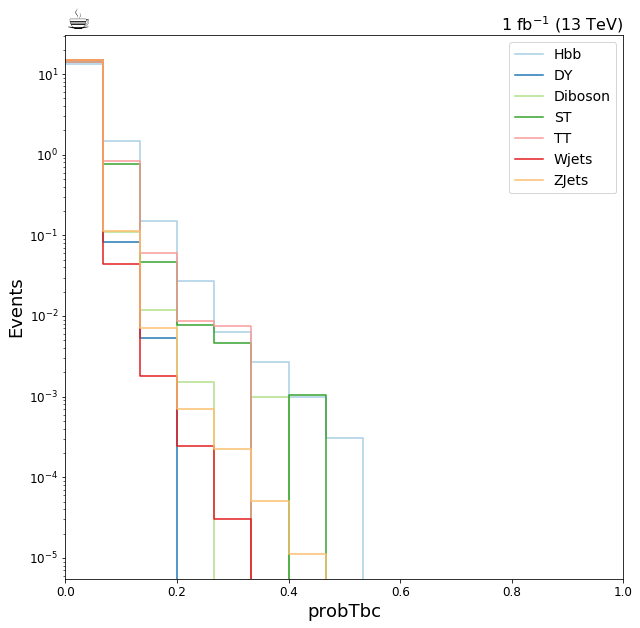

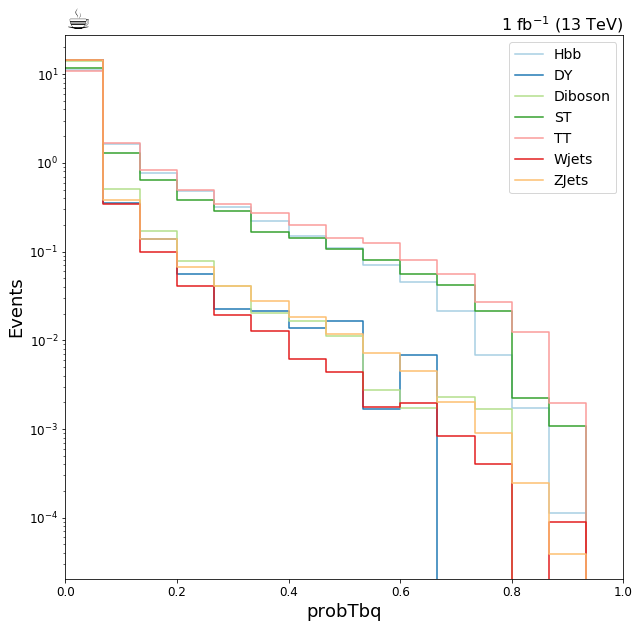

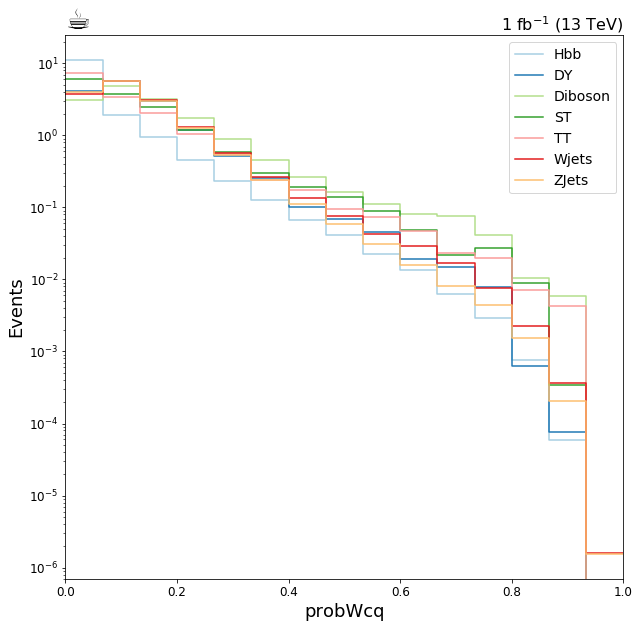

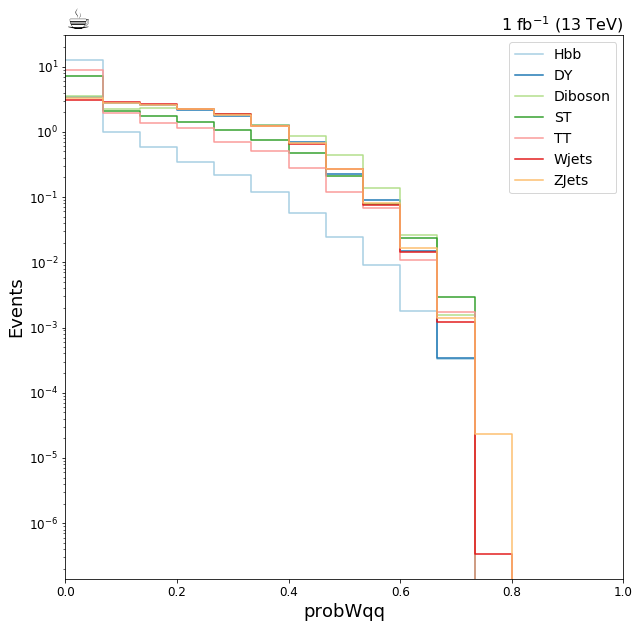

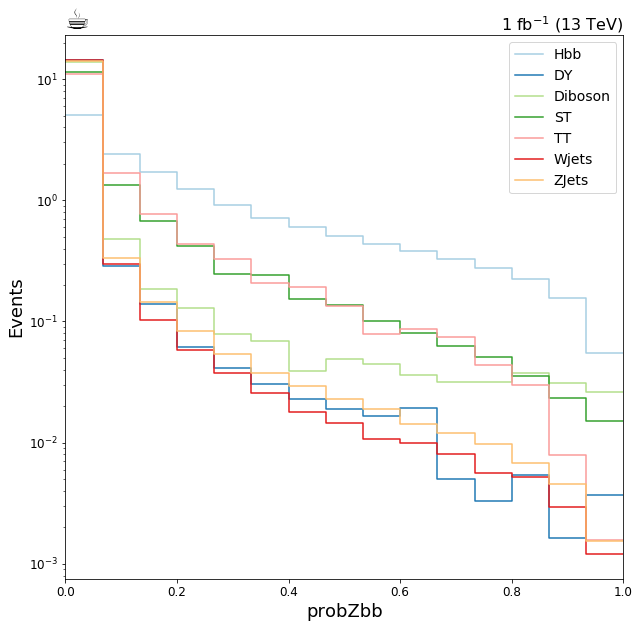

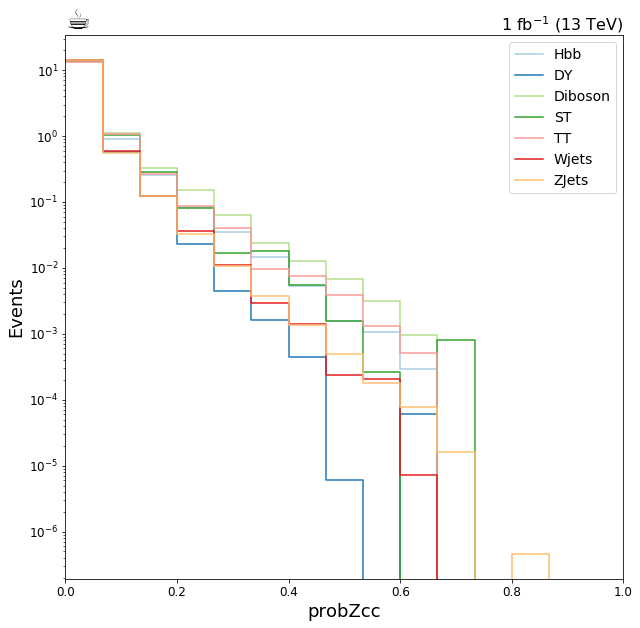

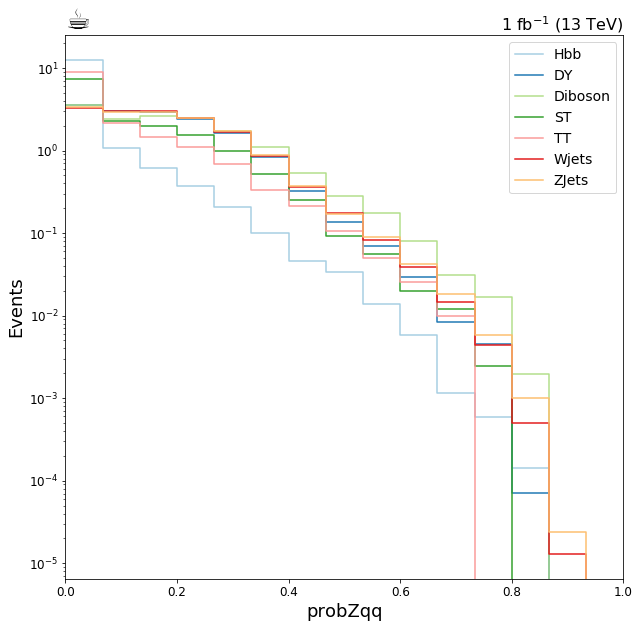

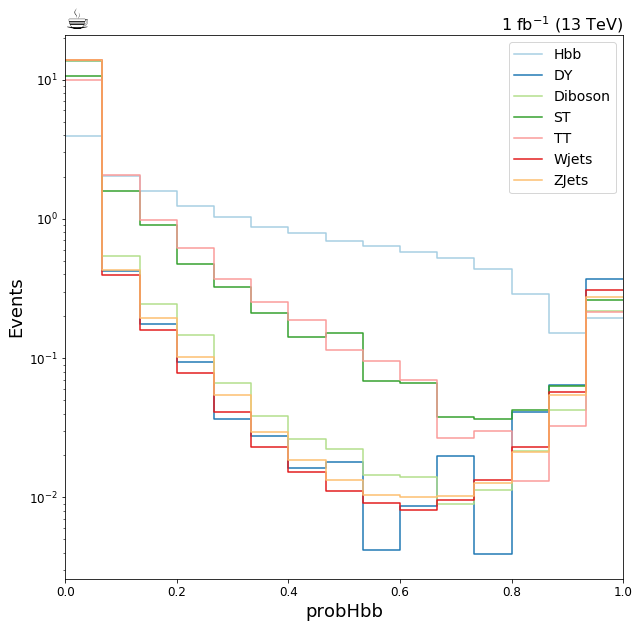

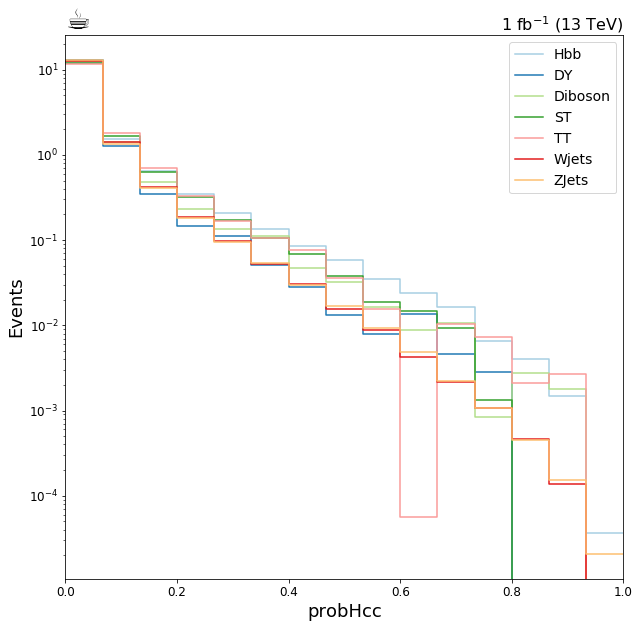

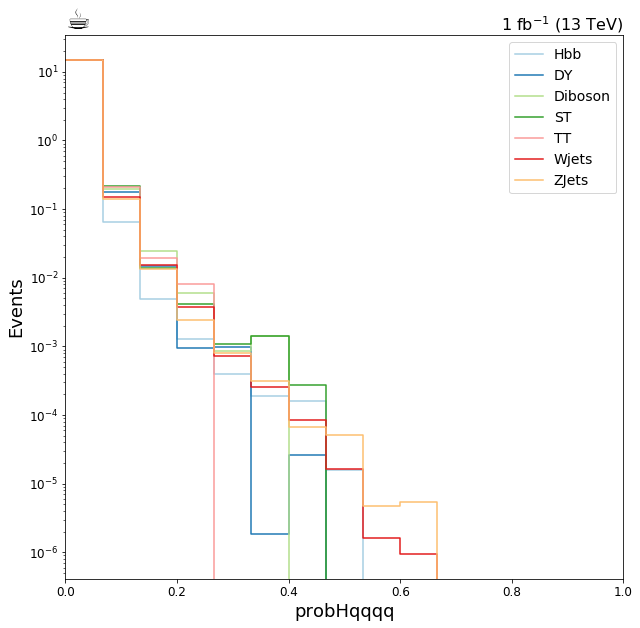

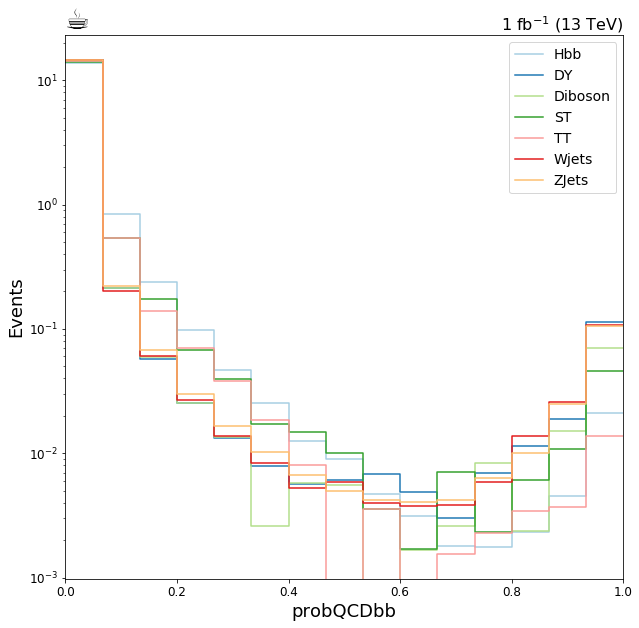

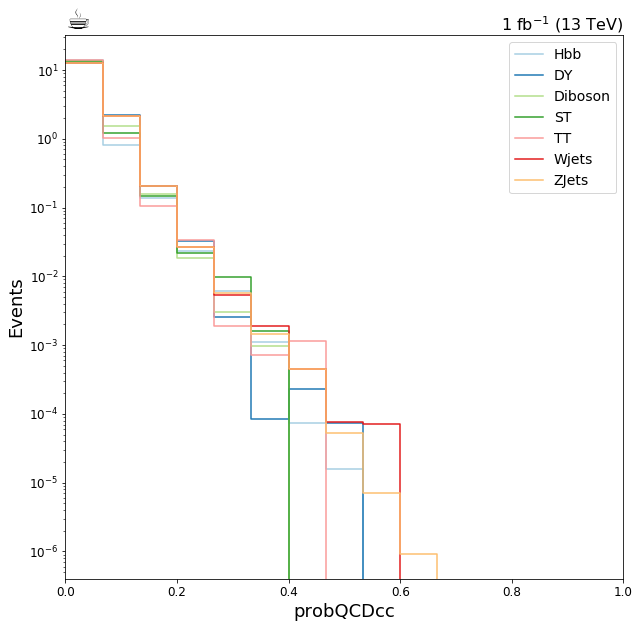

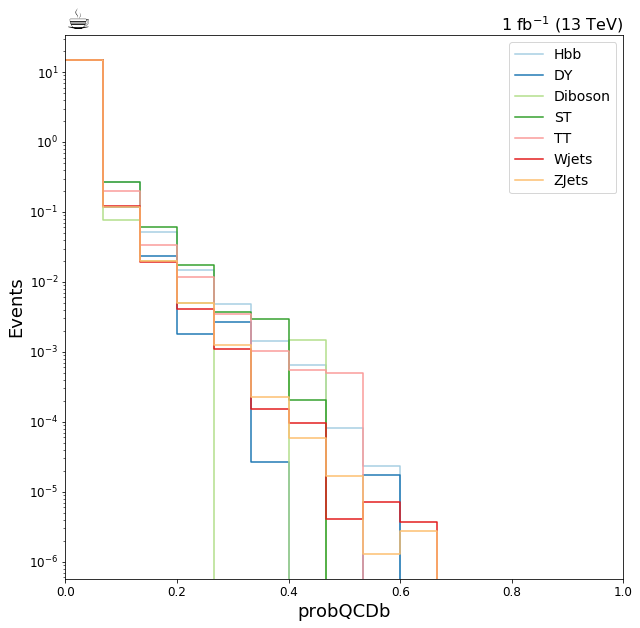

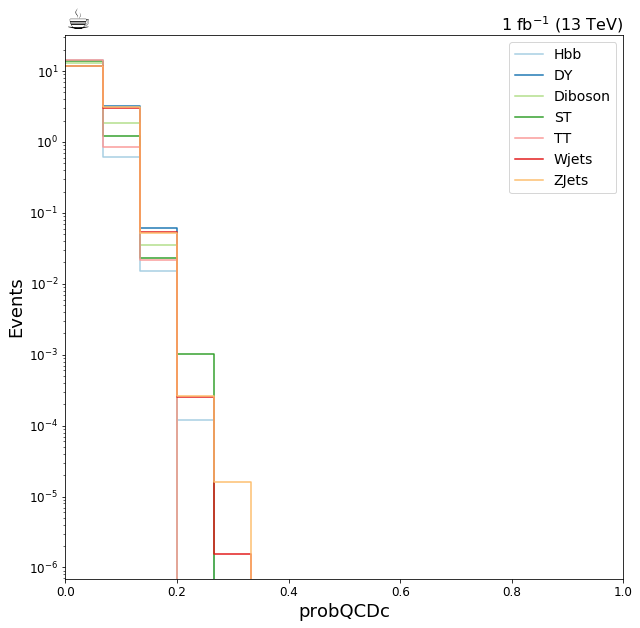

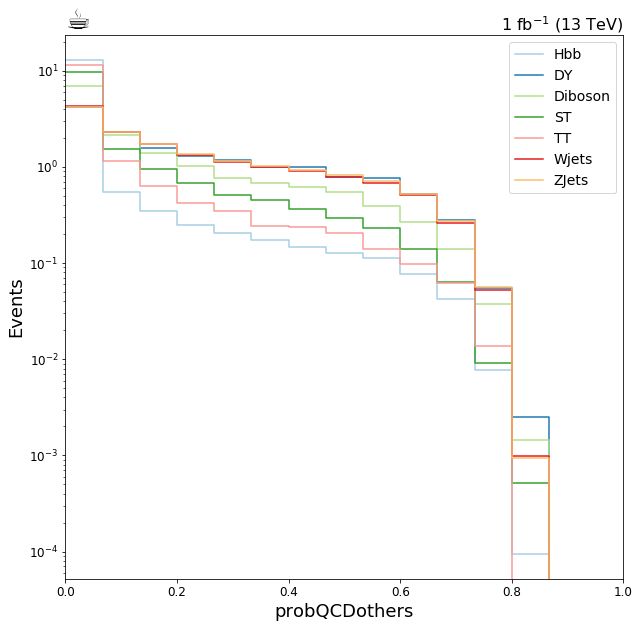

In [16]:
if not os.path.exists('unstack'):
    os.makedirs('unstack')


for key in hists.keys():
    if key=='sumw': continue
    
    jet_selection='topveto'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.01, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))